In [6]:
%load_ext signature
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from dask import dataframe as dd
from mpl_toolkits.basemap import Basemap


columns = ['name', 'amenity', 'Longitude', 'Latitude']
df = dd.read_csv('csv/POIWorld.csv', usecols=columns)
df

The signature extension is already loaded. To reload it, use:
  %reload_ext signature


dd.DataFrame<read-csv-5, divisions=(None, None, None, ..., None, None)>

In [37]:
with_amenity = df[df.amenity.notnull()]
with_amenity.amenity.value_counts().compute().head(50)

bench               492190
restaurant          400620
place_of_worship    389266
school              335937
parking             282460
fuel                198865
post_box            181858
cafe                156946
bank                152218
fast_food           146962
recycling           135912
pharmacy            127259
waste_basket        119881
grave_yard          118324
bicycle_parking     110657
post_office         102431
drinking_water       94594
pub                  94416
toilets              93708
telephone            90894
atm                  84757
hospital             77662
kindergarten         73768
bar                  70654
hunting_stand        66413
shelter              64508
vending_machine      60214
police               56339
fire_station         50451
fountain             43989
library              37973
townhall             37811
doctors              35603
social_facility      28375
public_building      27526
waste_disposal       25258
dentist              23912
c

In [45]:
bars = with_amenity[with_amenity.amenity.str.contains(r'\bbar\b')]
pubs = with_amenity[with_amenity.amenity.str.contains(r'\bpub\b')]

In [47]:
lon, lat = (pd.concat([bars.Longitude.compute(), pubs.Longitude.compute()]), 
            pd.concat([bars.Latitude.compute(), pubs.Latitude.compute()]))

In [51]:
blon, blat = bars.Longitude.compute(), bars.Latitude.compute()
plon, plat = pubs.Longitude.compute(), pubs.Latitude.compute()

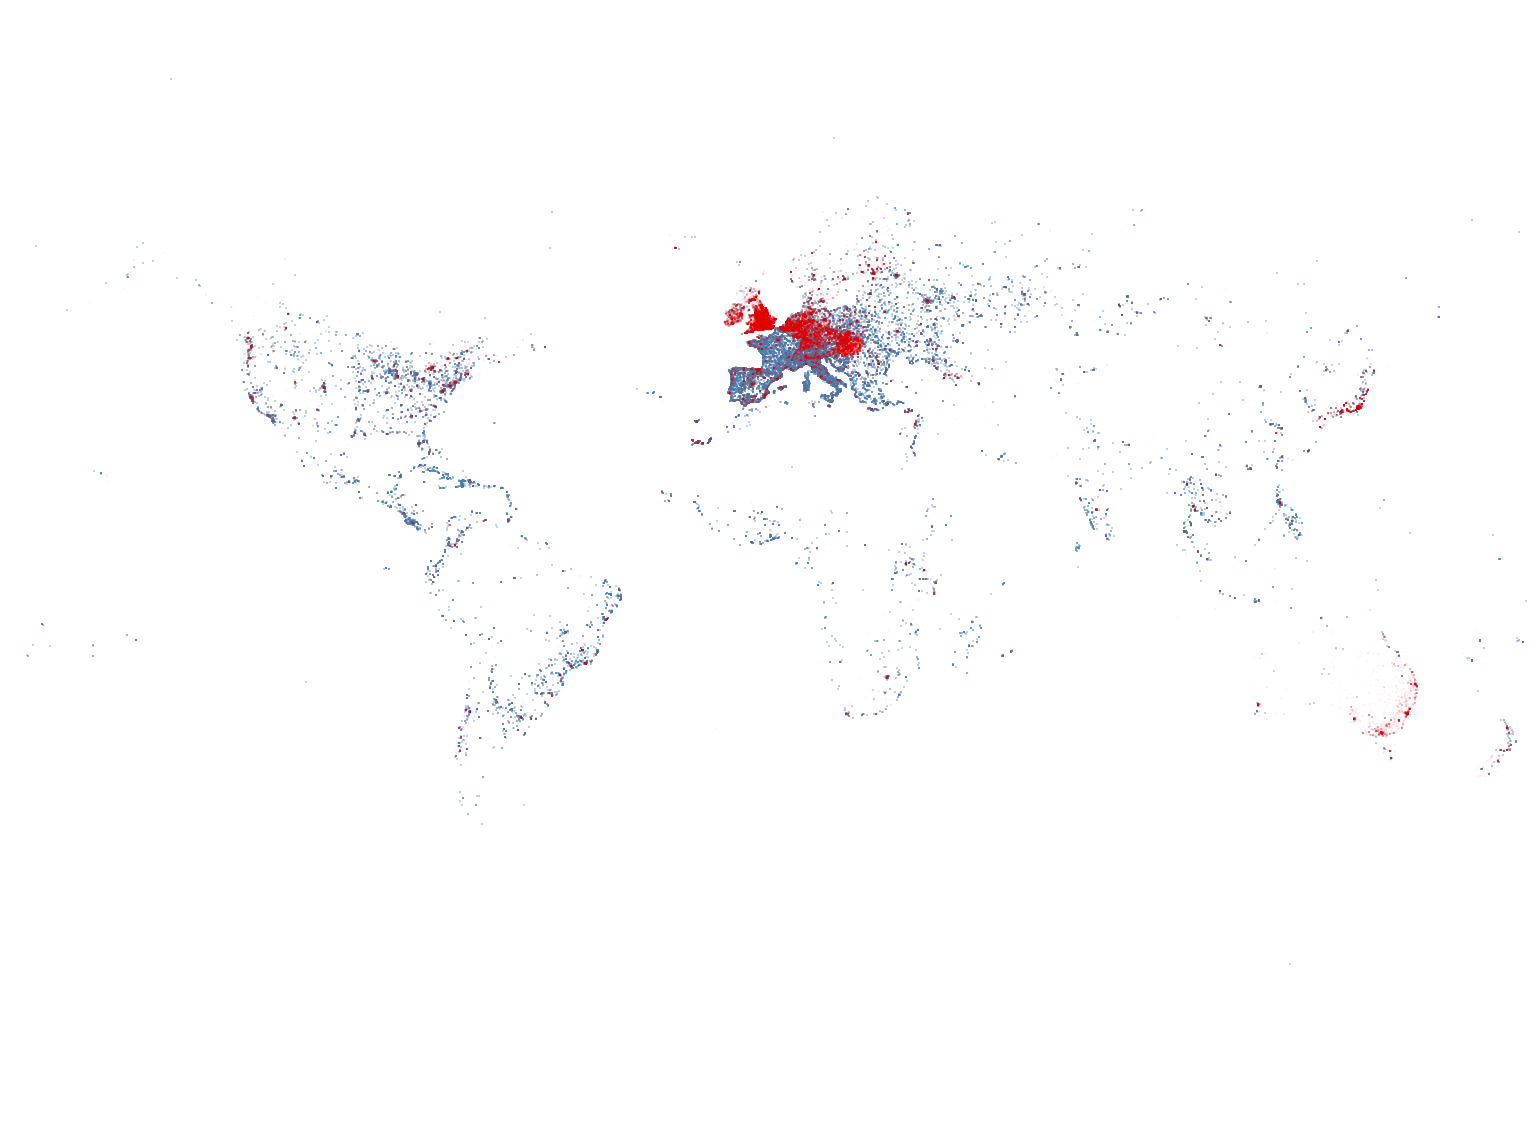

In [59]:
fig, ax = plt.subplots(figsize=(30, 20))

#m = Basemap(projection='mill', lon_0=-5.23636, lat_0=53.866772, llcrnrlon=-10.65073, llcrnrlat=49.16209, urcrnrlon=1.76334, urcrnrlat=60.860699)
m = Basemap(projection='mill', lon_0=0, lat_0=0, llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90)

m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

x, y = m(blon.values, blat.values)
m.scatter(x, y, s=1, marker='.', color="steelblue", alpha=0.8)

x, y = m(plon.values, plat.values)
m.scatter(x, y, s=.01, marker='.', color="red", alpha=0.8)